## 1. KMeans Clustering

Le clustering K-means est un type d'apprentissage non supervisé, utilisé avec un ensemble de données non étiqueté. Le but de cet algorithme est de trouver K groupes dans les données. L'algorithme fonctionne de manière itérative pour attribuer chaque point de données à l'un des K groupes en fonction des fonctionnalités fournies. Les points de données sont regroupés en fonction de la similarité des caractéristiques. Les résultats de l’algorithme de clustering K-means sont :

- Les centroïdes des K clusters, qui peuvent être utilisés pour étiqueter de nouvelles données
- Étiquettes pour les données d'entraînement (chaque point de données est attribué à un seul cluster)

## Customer Segementation In KMeans Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist
from math import pi
from sklearn.preprocessing import StandardScaler #pour la normalisation de valeurs à une échelle StandardScaler


## 2.1. Présentation du problème et chargement de données

### 2.1. Analyse de base de données 'Live'
La base de données **Live** contient les informations collectées auprès de vendeurs sur FaceBook en Thailande. Elle comprend différents types de statuts 
(Photos, vidéos, etc.) ainsi que les différentes métriques commes les 'Likes', 'shares', 'comments'. Les détails précis des variables peuvent varier du fichier spécifique utilisé.

**-status_id** : l'ID unique de chaque publication

**status_type** : Le tyê de publication par exemple (photo, vidéo, status, lien)

**status_published** : la date de publication du statut

**num_reactions** :  le nombre total de réations à la publication (par exemple : likes, love, wowo, haha, sad, angry)

**num_comments** : le nombre de commentaires sur la publication  

**num_shares** : le nombre de partages de la publication  

**num_likes** : le nombre totam de j'aime pour la publication

**num_loves** : le nombre total de Love réactions pour la publication

**num_wows** :  le nombre total de wows réactions pour la publication

**num_hahas** : le nombre total de haha réactions pour la publication

**num_sads** : le nombre total de sads réactions pour la publication

**num_angrys** : le nombre total de **Angry** eéactions pour la publication

**CalumnX** : Description de la colonne X ( Repéter pour les autres colonnes)

L'objectif est **d'analyser et de découvrir les modèles et tendances dans les données qui peuvent nous aider à comprendre comment les utilisateurs de Facebook en Thaillande** interagissent avec les publications des vendeurs en ligne. Ces informations peuvent être utilisées pour optimiser la stratégie de contenu de vendeurs, améliorer l'engagement des utilisateurs et traitement, augmenter les ventes


In [2]:
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
#Supprimer les colonnes inutils
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_published'], axis=1)
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0


In [4]:
# Mettre l'index dans le dataset pour avoir de valeur numérique
df = df.set_index('status_id')

In [5]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,
246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0
1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0
1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0


In [6]:
#Vérifier les données manquantes dans chaque colonne
df.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [7]:
df.describe(include="all") # **all**  veut dire à la fois les valeurs quali et quanti

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,photo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,NaN,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000


### Etape 1 : Description des données : Univariée

Pour voir la répartition de l'ensemble de données

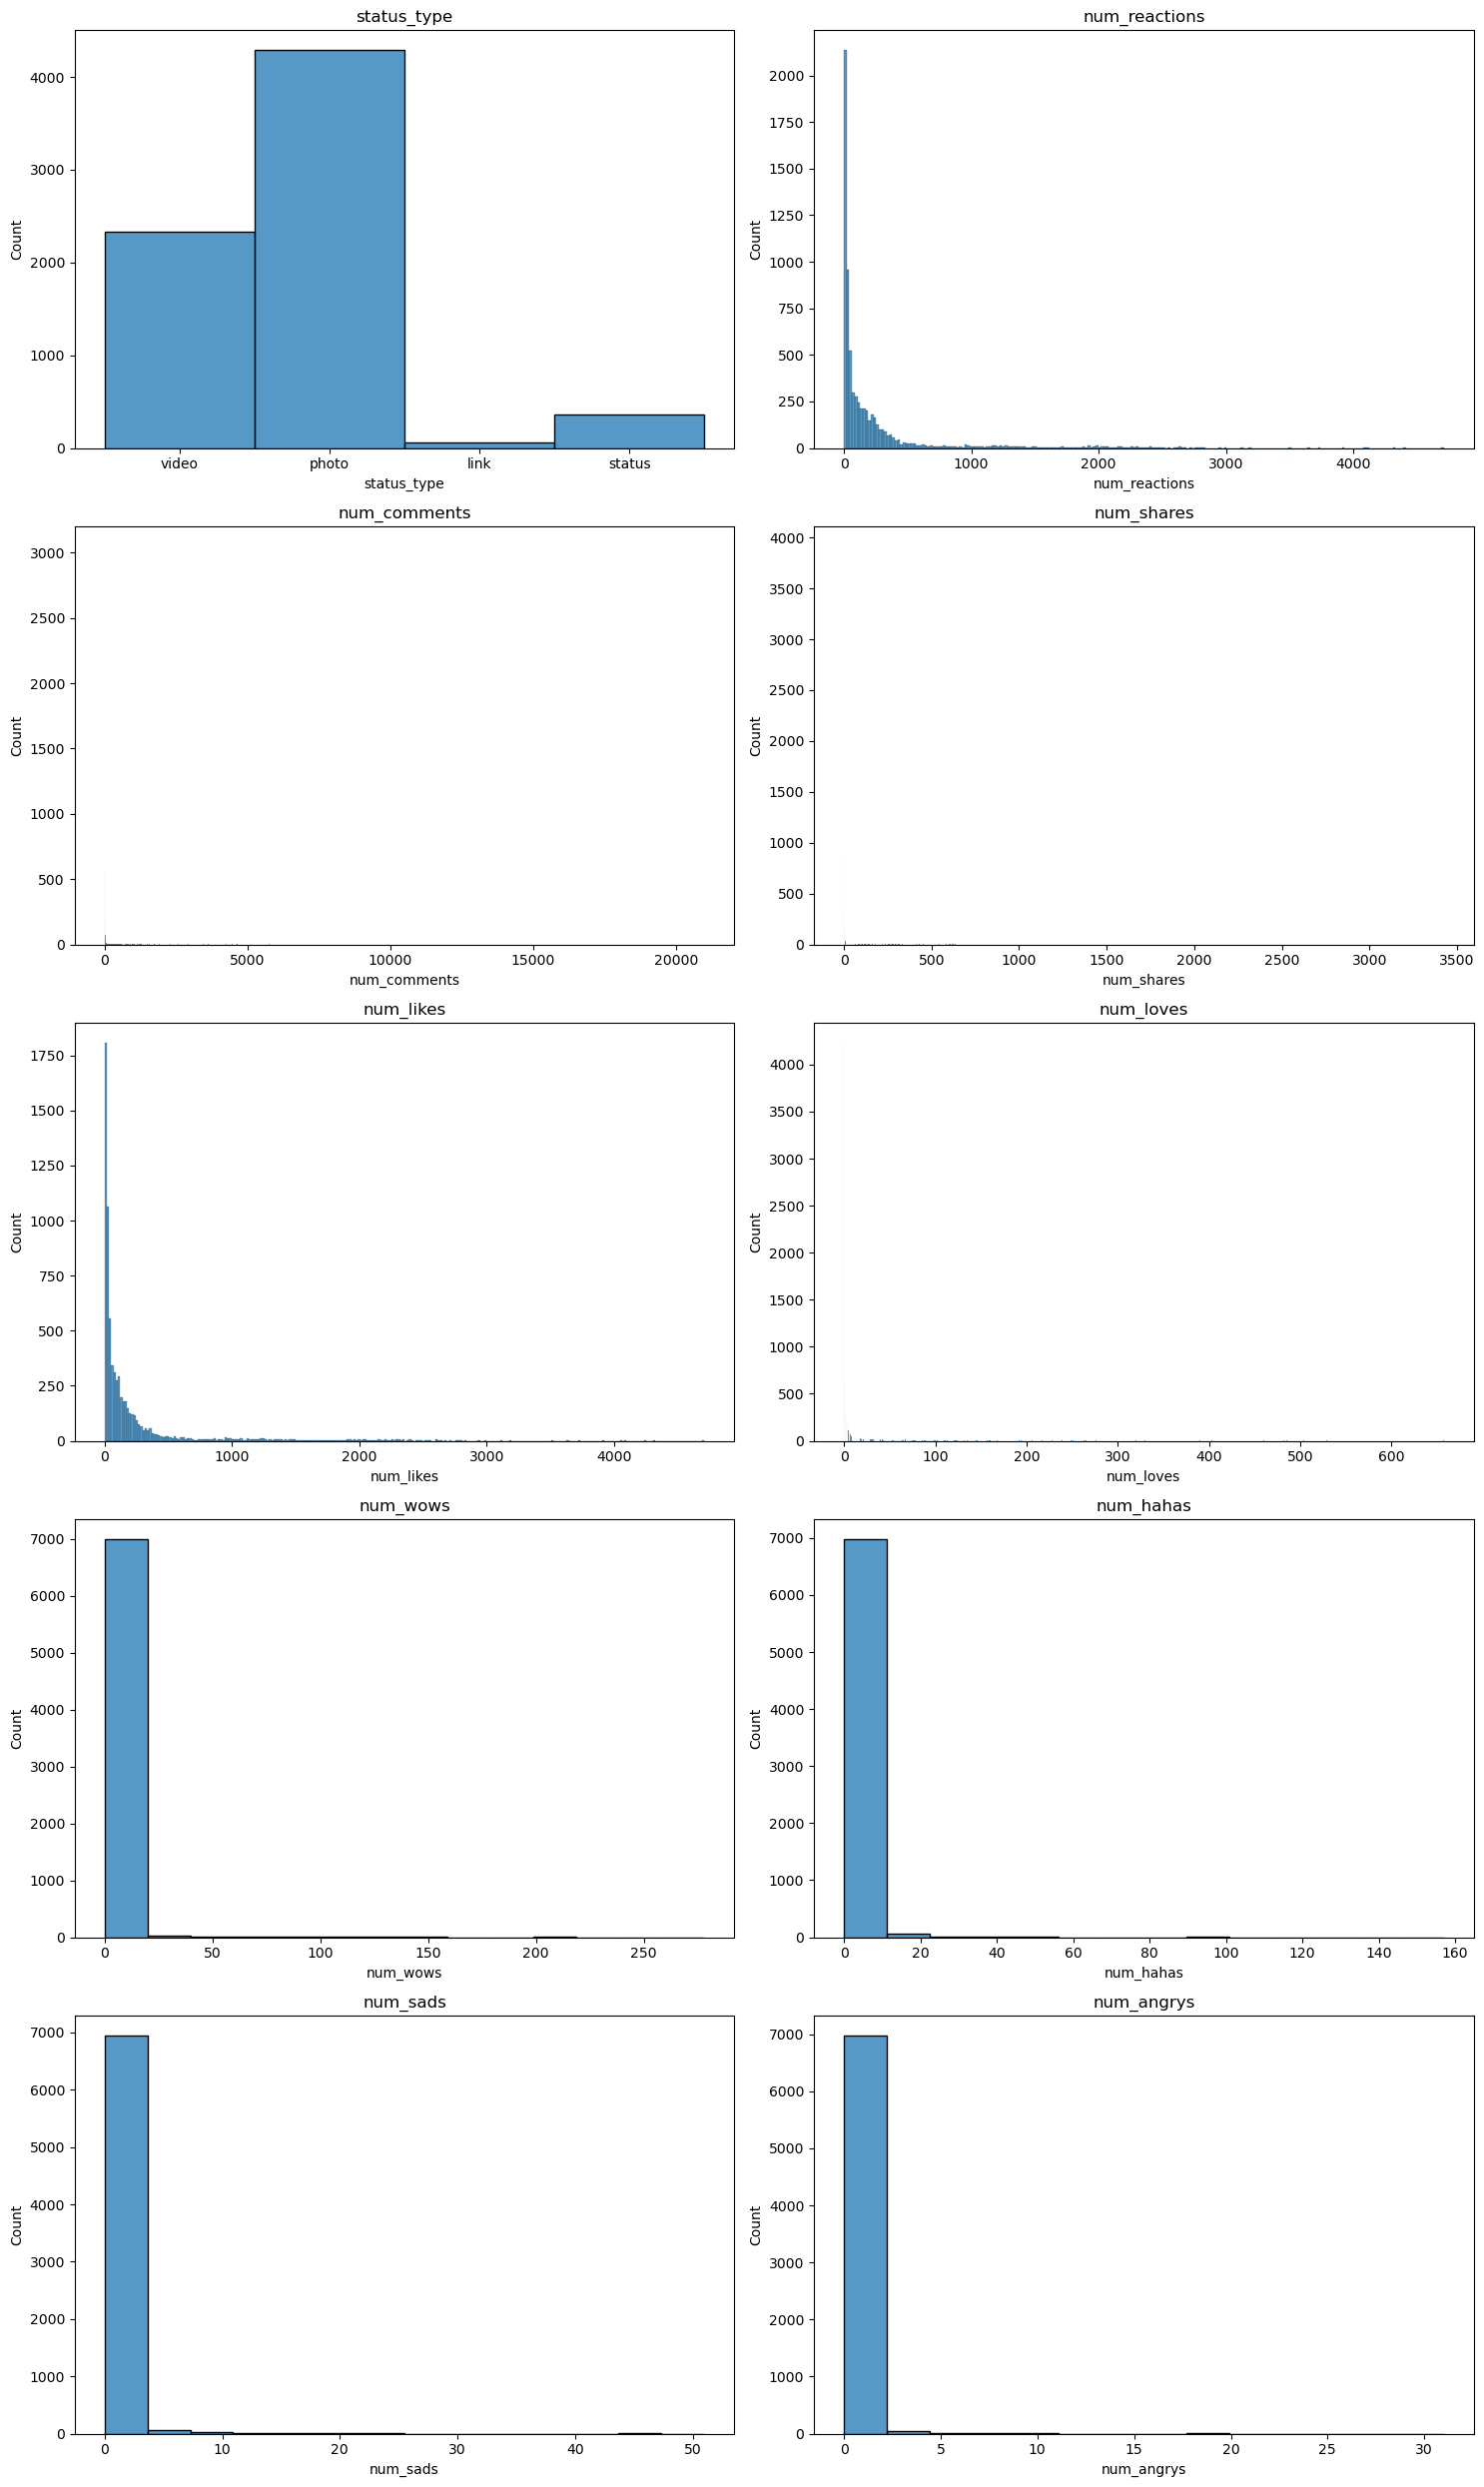

In [8]:
num_cols = len(df.columns)
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1

plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(df[column].dropna())
    plt.title(column)
plt.tight_layout() # Pour éviter les chevauchements des graphiques
plt.show()

### Etape 2 : Analyse de données Bivariées

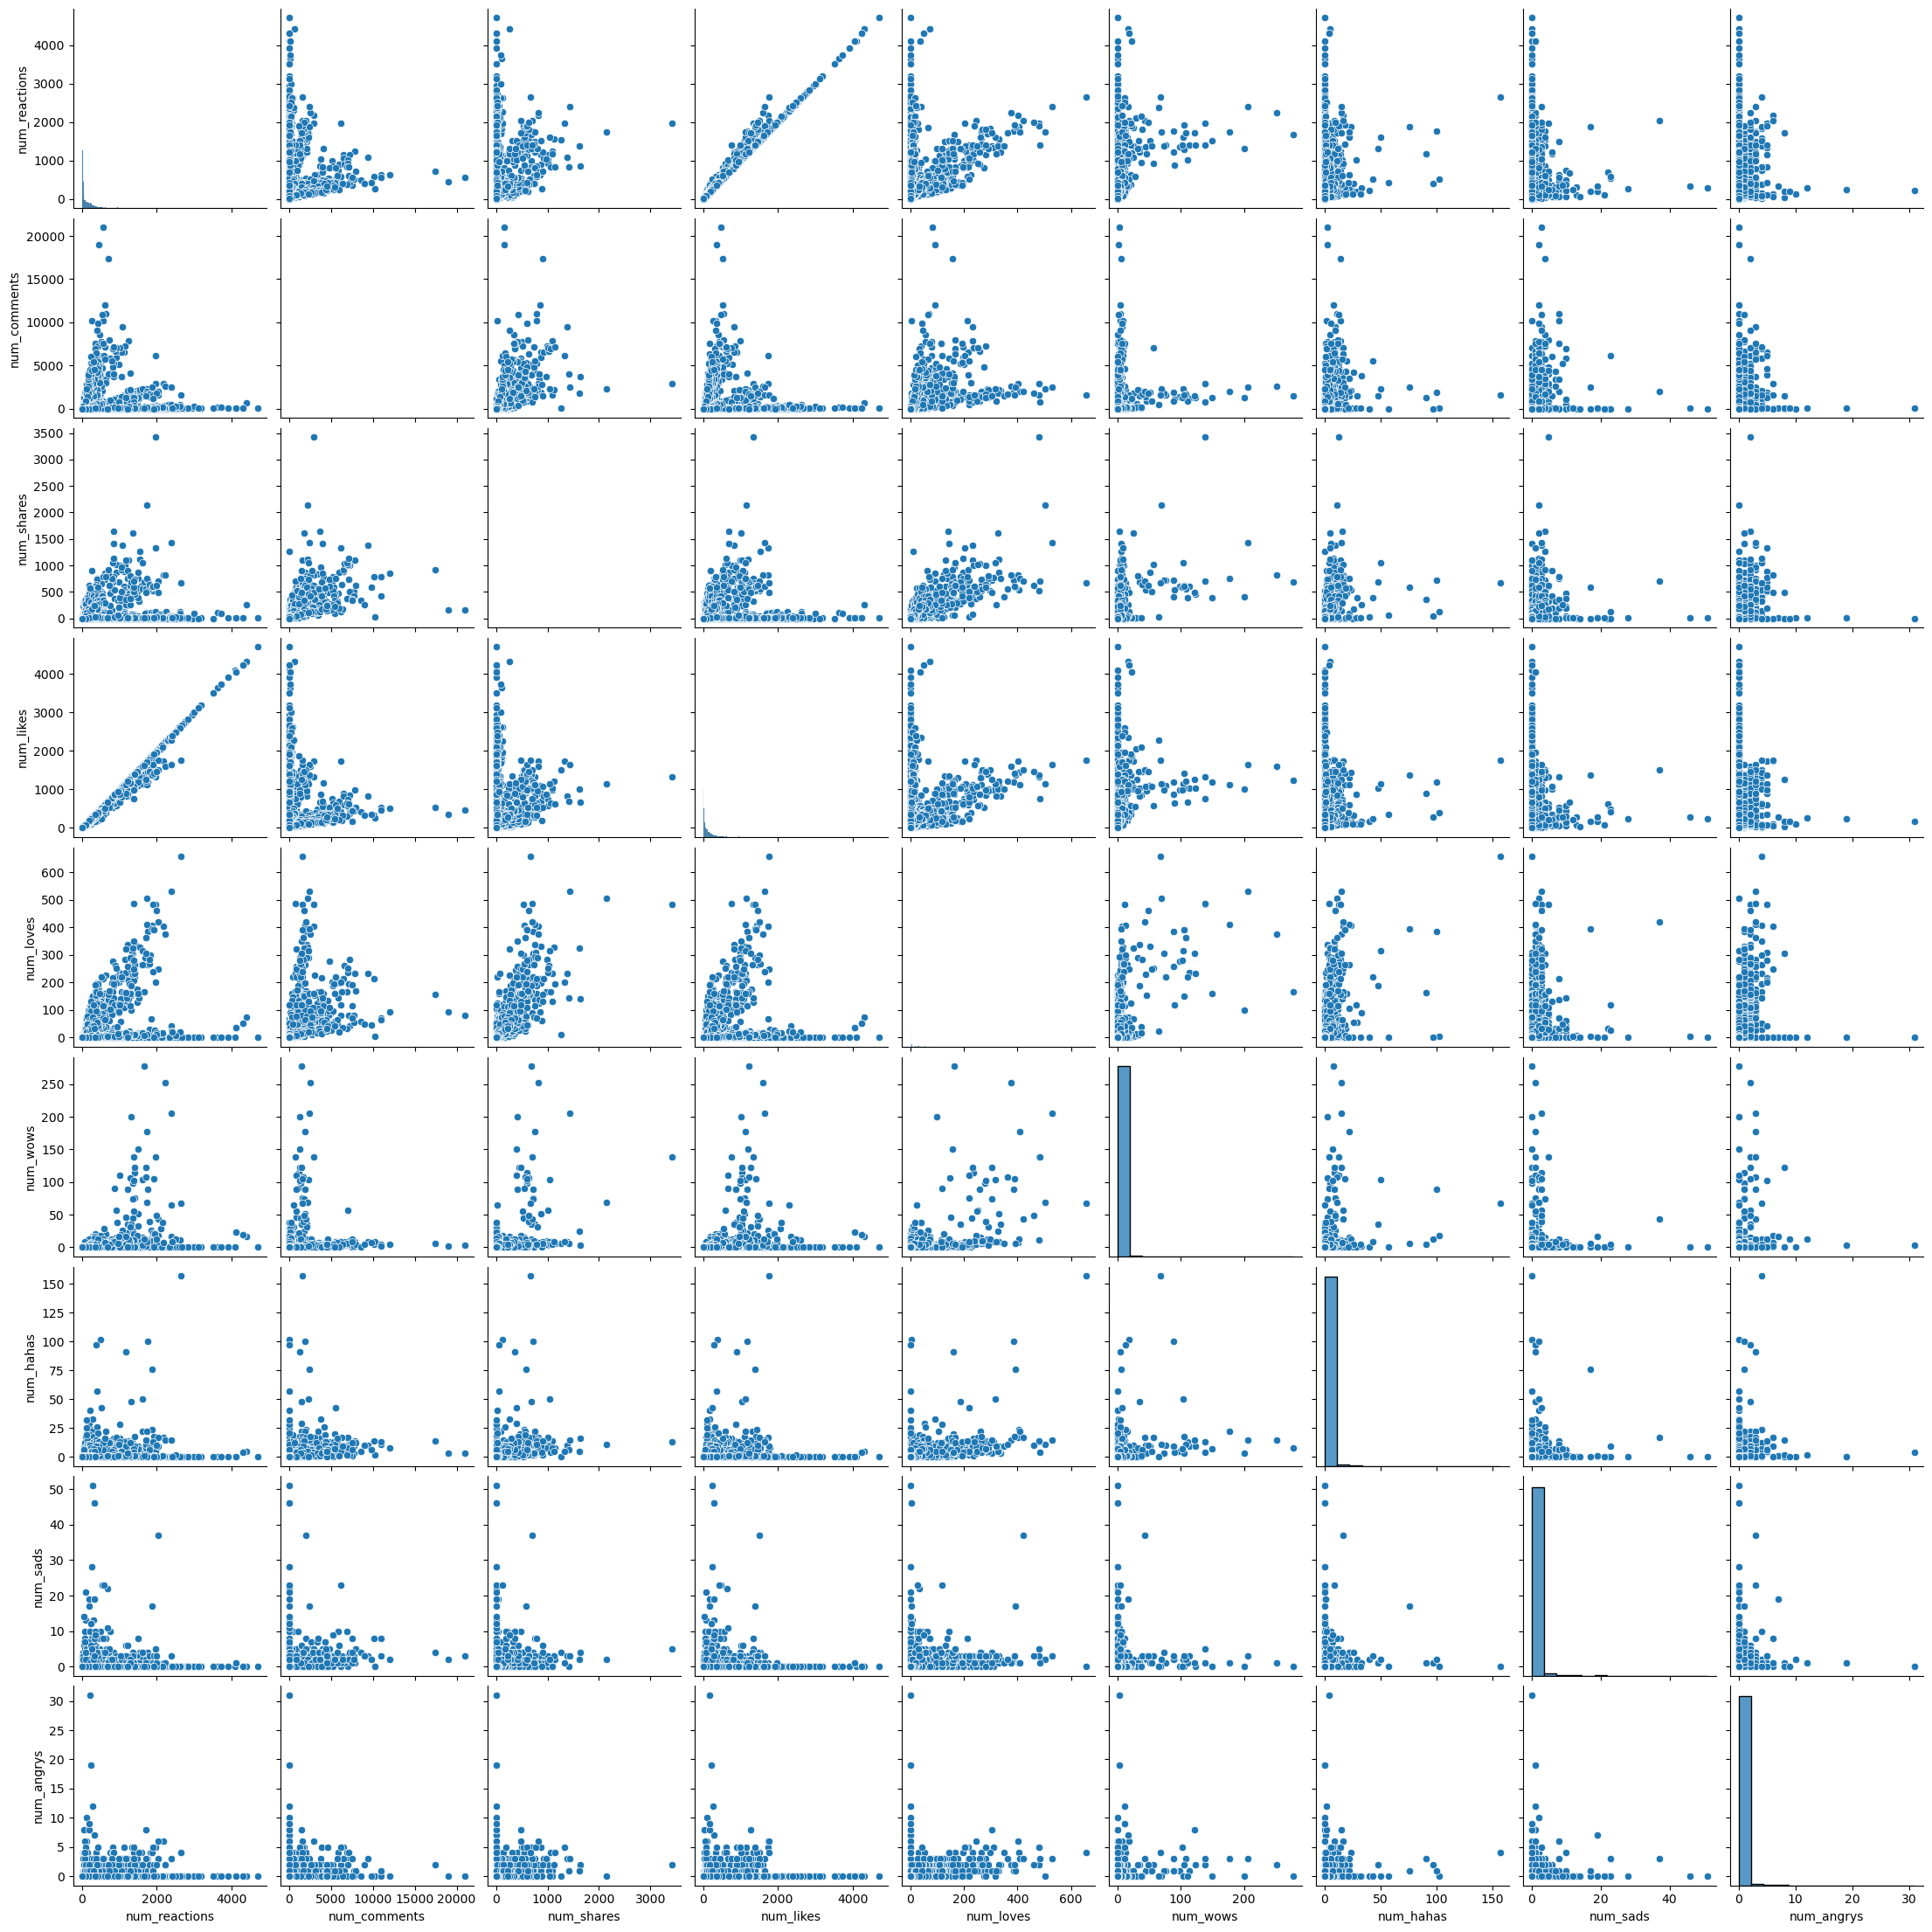

In [9]:
#Graphiques Bivarié
sns.pairplot(df)
plt.show()

In [10]:
# Calcul de la corrélation sur les valeurs numériques seulement
df_numeric = df.select_dtypes(include=[np.number])

# Calcul de la corrélation de Spearman
correlation_spearman = df_numeric.corr(method='spearman')

# Afficher les corrélations
correlation_spearman

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.731731,0.557824,0.996848,0.566720,0.481648,0.401321,0.272188,0.261825
num_comments,0.731731,1.000000,0.624171,0.708545,0.638492,0.496706,0.541926,0.354643,0.355031
num_shares,0.557824,0.624171,1.000000,0.526672,0.635137,0.460756,0.567575,0.358708,0.364631
num_likes,0.996848,0.708545,0.526672,1.000000,0.534878,0.466170,0.361442,0.249582,0.235741
num_loves,0.566720,0.638492,0.635137,0.534878,1.000000,0.627628,0.618892,0.394369,0.380992
num_wows,0.481648,0.496706,0.460756,0.466170,0.627628,1.000000,0.481603,0.306713,0.313149
num_hahas,0.401321,0.541926,0.567575,0.361442,0.618892,0.481603,1.000000,0.441237,0.482089
num_sads,0.272188,0.354643,0.358708,0.249582,0.394369,0.306713,0.441237,1.000000,0.404778
num_angrys,0.261825,0.355031,0.364631,0.235741,0.380992,0.313149,0.482089,0.404778,1.000000


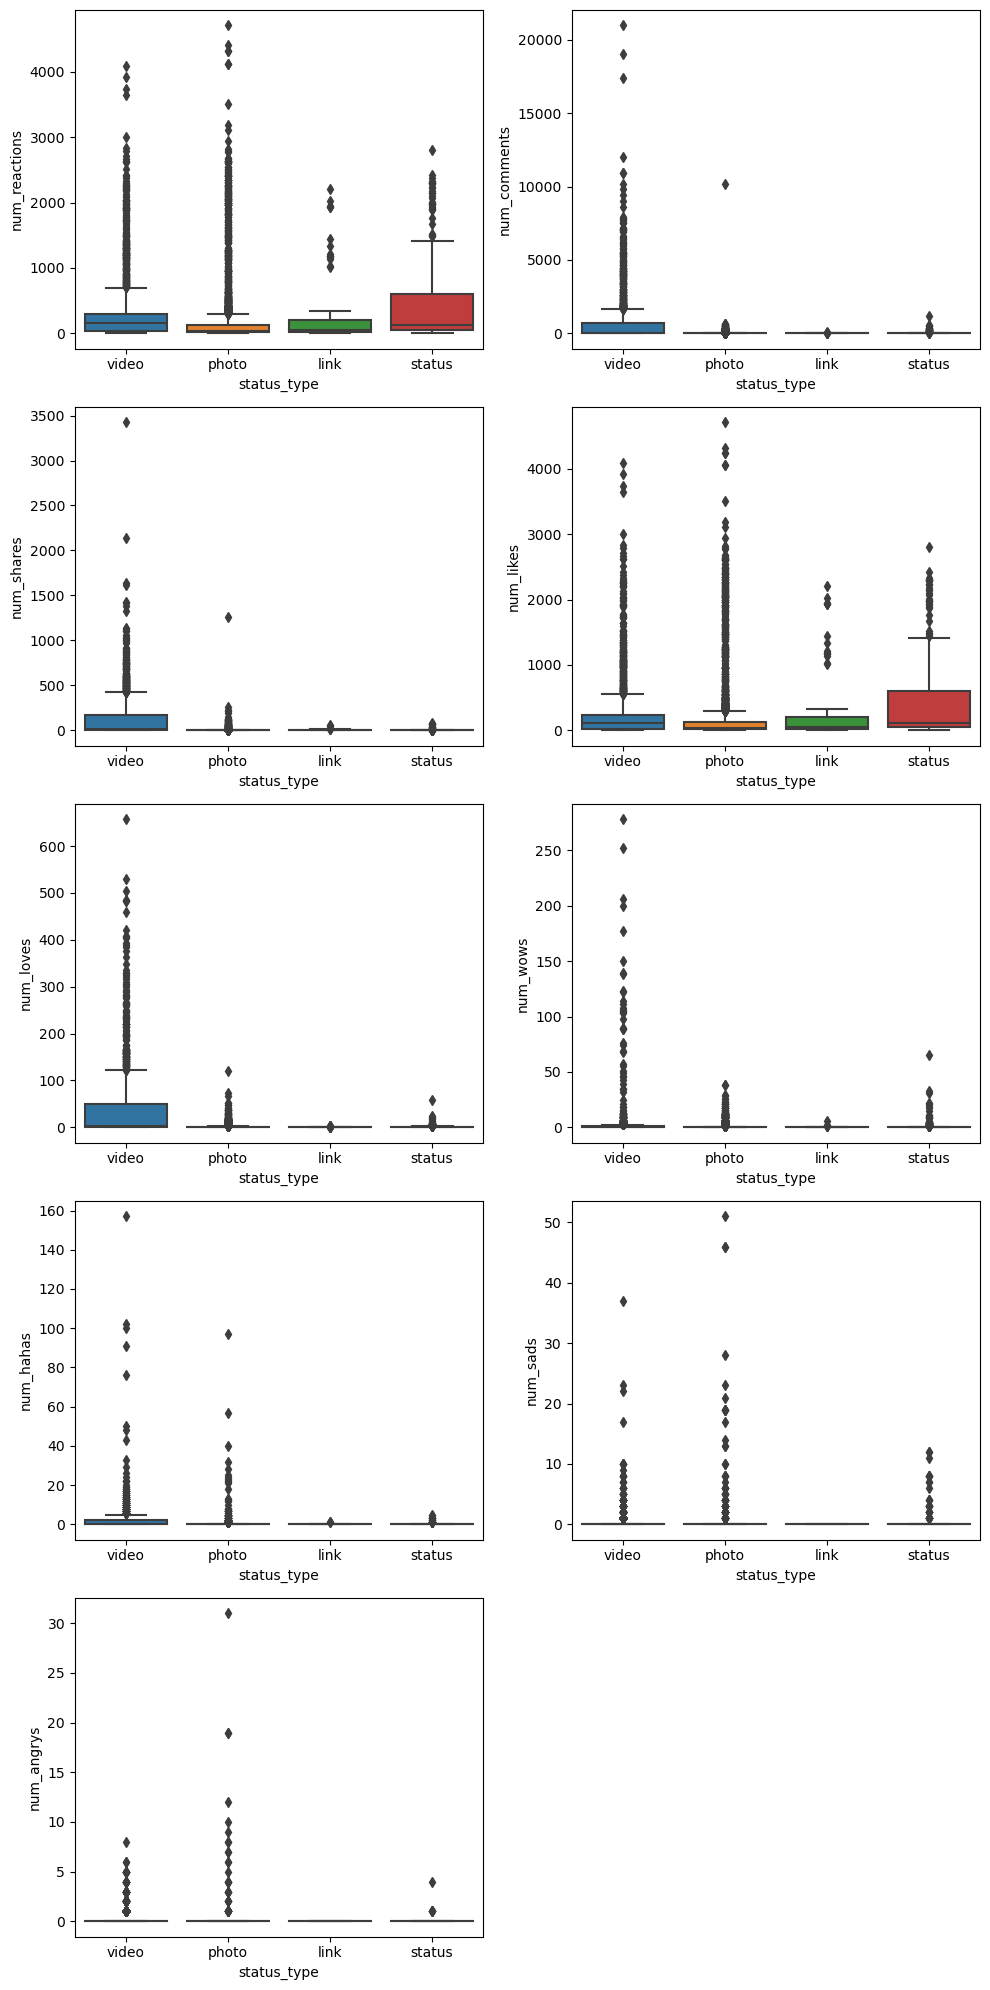

In [13]:
# Calcul de la corrélation sur les valeurs numériques seulement
df_numeric = df.select_dtypes(include=[np.number])

# Remettons la colonne status_type dans la dataset
df_numeric['status_type'] = df['status_type']

#Créer boxplot pour chaque colonne numérique
num_cols = len(df.columns) - 1 # Pour exclure la colonne status_type

# Nombre de lignes pour le sous graphique
num_rows = num_cols // 2
if num_cols % 2 :
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))

for i, column in enumerate(df_numeric.columns.drop('status_type'), start = 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='status_type', y=column, data=df_numeric)

plt.tight_layout()
plt.show()

### Etape 4 Réalisation de l'ACP

In [11]:
# Sélectionner les colonnes numériques 
df_numeric = df.select_dtypes(include=[np.number])

#Normaliser les données afin d'avoir une échelle de valeur identique
scaler = StandardScaler()

df_normalized = scaler.fit_transform(df_numeric)

#ACP
pca = PCA()
df_pca = pca.fit_transform(df_normalized)

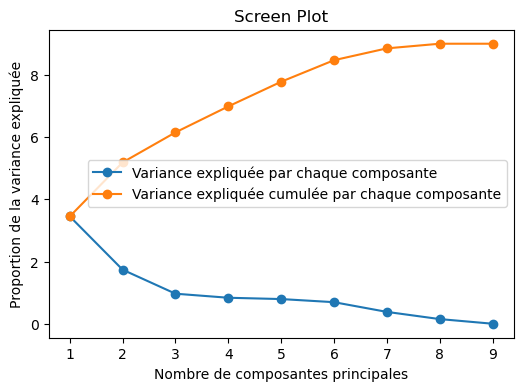

In [12]:
#Calcul de la variance expliquée cumulée
explained_variance = pca.explained_variance_

cumulative_explained_variance = np.cumsum(explained_variance)

#créer de screen plot avec de variance expliquée cumulée
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'o-', label='Variance expliquée par chaque composante')
plt.plot(range(1, len(explained_variance)+1), cumulative_explained_variance, 'o-', label='Variance expliquée cumulée par chaque composante')
plt.title("Screen Plot")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Proportion de la variance expliquée")
plt.legend()
plt.show()

la Figure ci-haut montre que la variance expliquée cumulée montre le trois premières Dimensions atteignent 70% d'inertie totale 
d'information, c'est qui est une bonne chose en ACP

### Creer le cercle de Corrélation

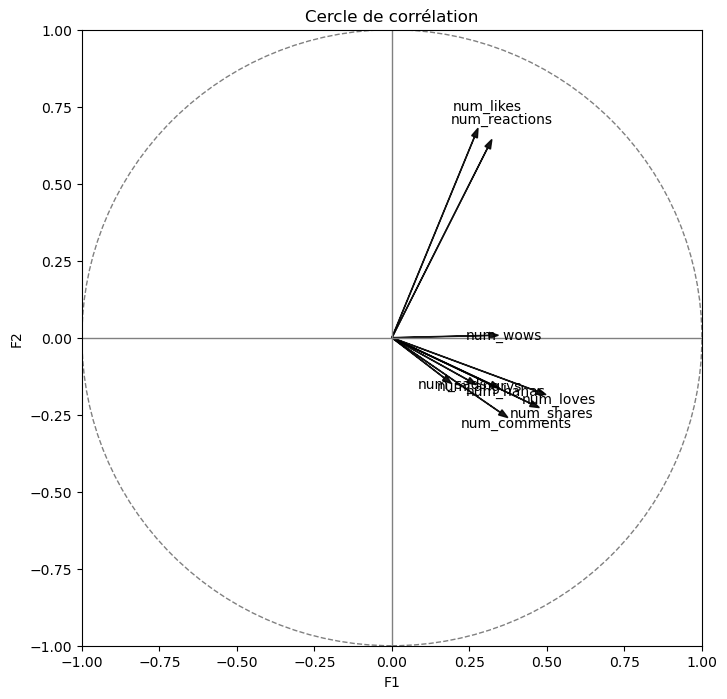

In [13]:
coef = np.transpose(pca.components_[0:2, :])
n = coef.shape[0]
xs = np.array([1,0])
ys = np.array([0,1])

#creer la figure
plt.figure(figsize=(8, 8))

#placer les vecteurs de variables
for i in range(n):
    plt.arrow(0, 0, coef[i, 0], coef[i, 1], color = 'k', alpha=0.9, head_width=0.02)
    plt.text(coef[i, 0] * 1.15, coef[i, 1] * 1.15, df_numeric.columns[i], color='k', ha='center', va='center') 

#Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

#Ajuster les limites et les axes

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Cercle de corrélation")
plt.show()

### Interprétations du cercle de corrélation
on voit une forte corrélation entre le nombre de likes et de réaction (c'est à dire les publications qui sont là auront beaucoup de Likes et de réactions par contre auront moins de partages, de commentaires)

Ensuite on observe une forte corrélation entre partage, commentaires, j'aime (c'est-à-dire les postes qui sont dans cette zone auront plus de commentaires, de partages, de j'aime mais pas de reactions te Likes)

Ensuite nous constatons plus ce sont les vidéos qui sont beaucoup plus partager, aimé, Commentés

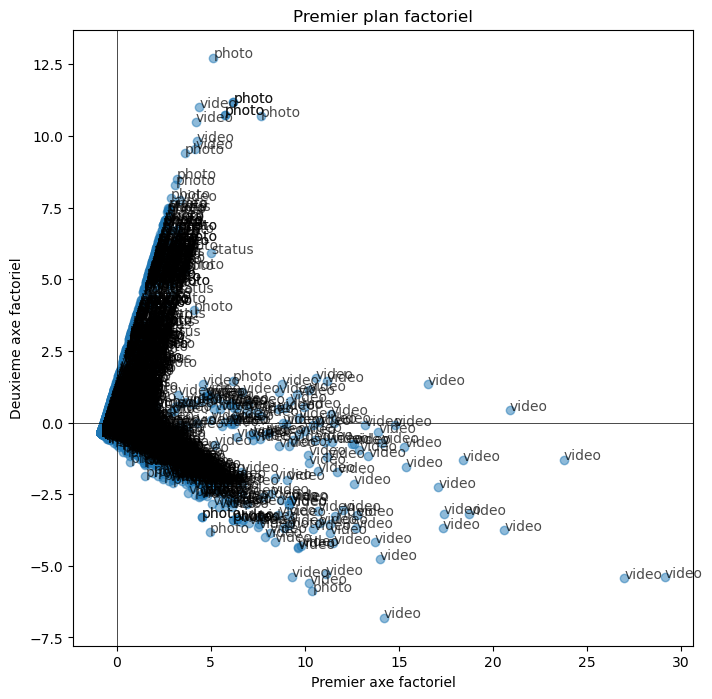

In [14]:
# Premier plan factoriel (première dimension)
fig, ax = plt. subplots(figsize=(8, 8))
ax.scatter(df_pca[:,0], df_pca[:,1], alpha=0.5)

# Ajouter des étiquettes pour chaque points
for i, status_type in enumerate(df['status_type']):
    ax.annotate(status_type, (df_pca[i, 0], df_pca[i, 1]), alpha=0.7)

#Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

#Ajouter des labels
ax.set_xlabel('Premier axe factoriel')
ax.set_ylabel('Deuxieme axe factoriel')

# Titre du graphique
plt.title("Premier plan factoriel")
plt.show()

### Etape 5 : Détermination de clusters avec K-means

Premièrement, on doit faire le choix du nombre optimal de clusters **méthode du coude et du score du silhouette**

In [15]:
#Premièrement, on doit faire le choix du nombre optimal de clusters (méthode du coude et du score du silhouette)
inertias = []
silhouette = []
K = range(2, 10) #hyper-parametre K optimal
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_normalized)
    inertias.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(df_normalized, kmeanModel.labels_))
    

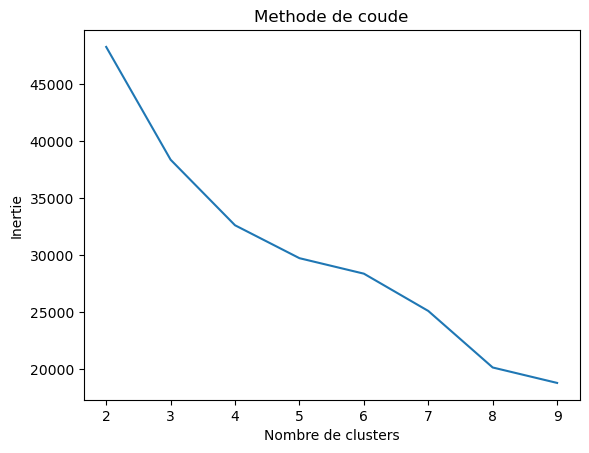

In [16]:
#Tracer la courbe de l'inertie en fonction de nombre de clusters
plt.plot(range(2, 10), inertias)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Methode de coude")
plt.show()

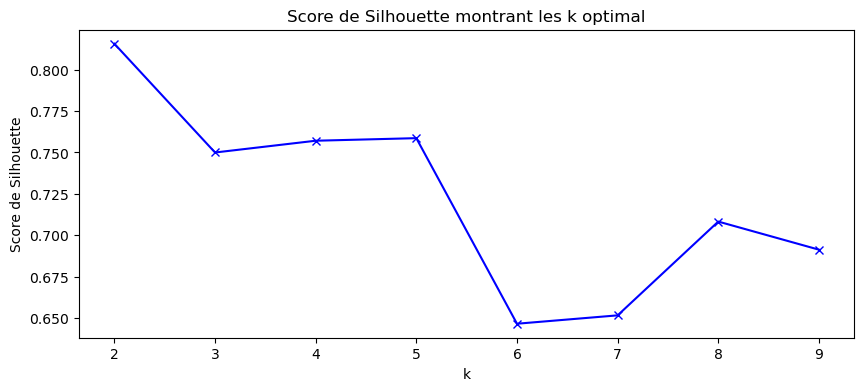

In [17]:
# Graphe de scoure de Silhouette
plt.figure(figsize=(10, 4))
plt.plot(K, silhouette, 'bx-')
plt.xlabel("k")
plt.ylabel("Score de Silhouette")
plt.title("Score de Silhouette montrant les k optimal")
plt.show()

In [18]:
# Appliquer les K-means avec le nombre de clusters optimal trouvé (supposons que c'est 3 pour cet exemple)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_normalized)

KMeans(n_clusters=4, random_state=42)

In [19]:
# Ajouter les labels de clusters dans notre jeu de données de départ
df['cluster_label'] = kmeans.labels_

#Afficher le nombre de clusters possibles pour notre exemple on en a 4 : de 0 à 3
df['cluster_label'].value_counts()

cluster_label
0    6300
2     371
1     353
3      26
Name: count, dtype: int64

In [20]:
# Interprétations de groupes
# Afficher les statistiques de Clusters
clusters_state = df.groupby('cluster_label')[df_numeric.columns].mean() #Filtrer par étiquette, puis claculer la moy de chaque colonne numérique
clusters_state

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
cluster_label,,,,,,,,,
0,110.854603,80.411429,17.806032,103.509206,6.355873,0.533333,0.292381,0.120635,0.040794
1,579.518414,2861.226629,409.413598,450.339943,113.739377,4.492918,6.977337,2.566572,1.390935
2,1825.617251,61.474394,11.676550,1819.824798,3.113208,2.442049,0.199461,0.032345,0.005391
3,1618.000000,1626.846154,812.538462,1146.961538,322.692308,124.538462,20.423077,1.538462,1.846154


#### Interprétations de Groupes : Sur le plan de moyennes

On régarde les valeurs de cellule ou la valeur est trop grande ou trop petite pour interpréter :

**1er groupe 0 :** C'est un groupe où il y a pas beaucoup d'engagements (pas assez de commentaires, moins de partages, de Likes

**2eme groupe 1 :** Ce groupe de publications a beaucoup d'engagement pcq dans la colonne num_comments la valeur 2950 par contre moins  de partages (**colonne num_chars** la valeur est trop faible : 468, 

**3eme groupe 2 :** ce groupe est caractérisé par les nombres de **réactions, de Likes** 

**4eme groupe 3 :** Les publications de ce groupe sont beaucoup commentés, likés et partagés: il suffit de jeter un regard sur les valeurs de colonnes : **num_reactions	num_comments	num_shares	num_likes	num_loves** 

Le 1er groupe doit attirer l'attention sur l'amélioration du contenu publié pour attirer plus de commentaires de Likes et de Partages

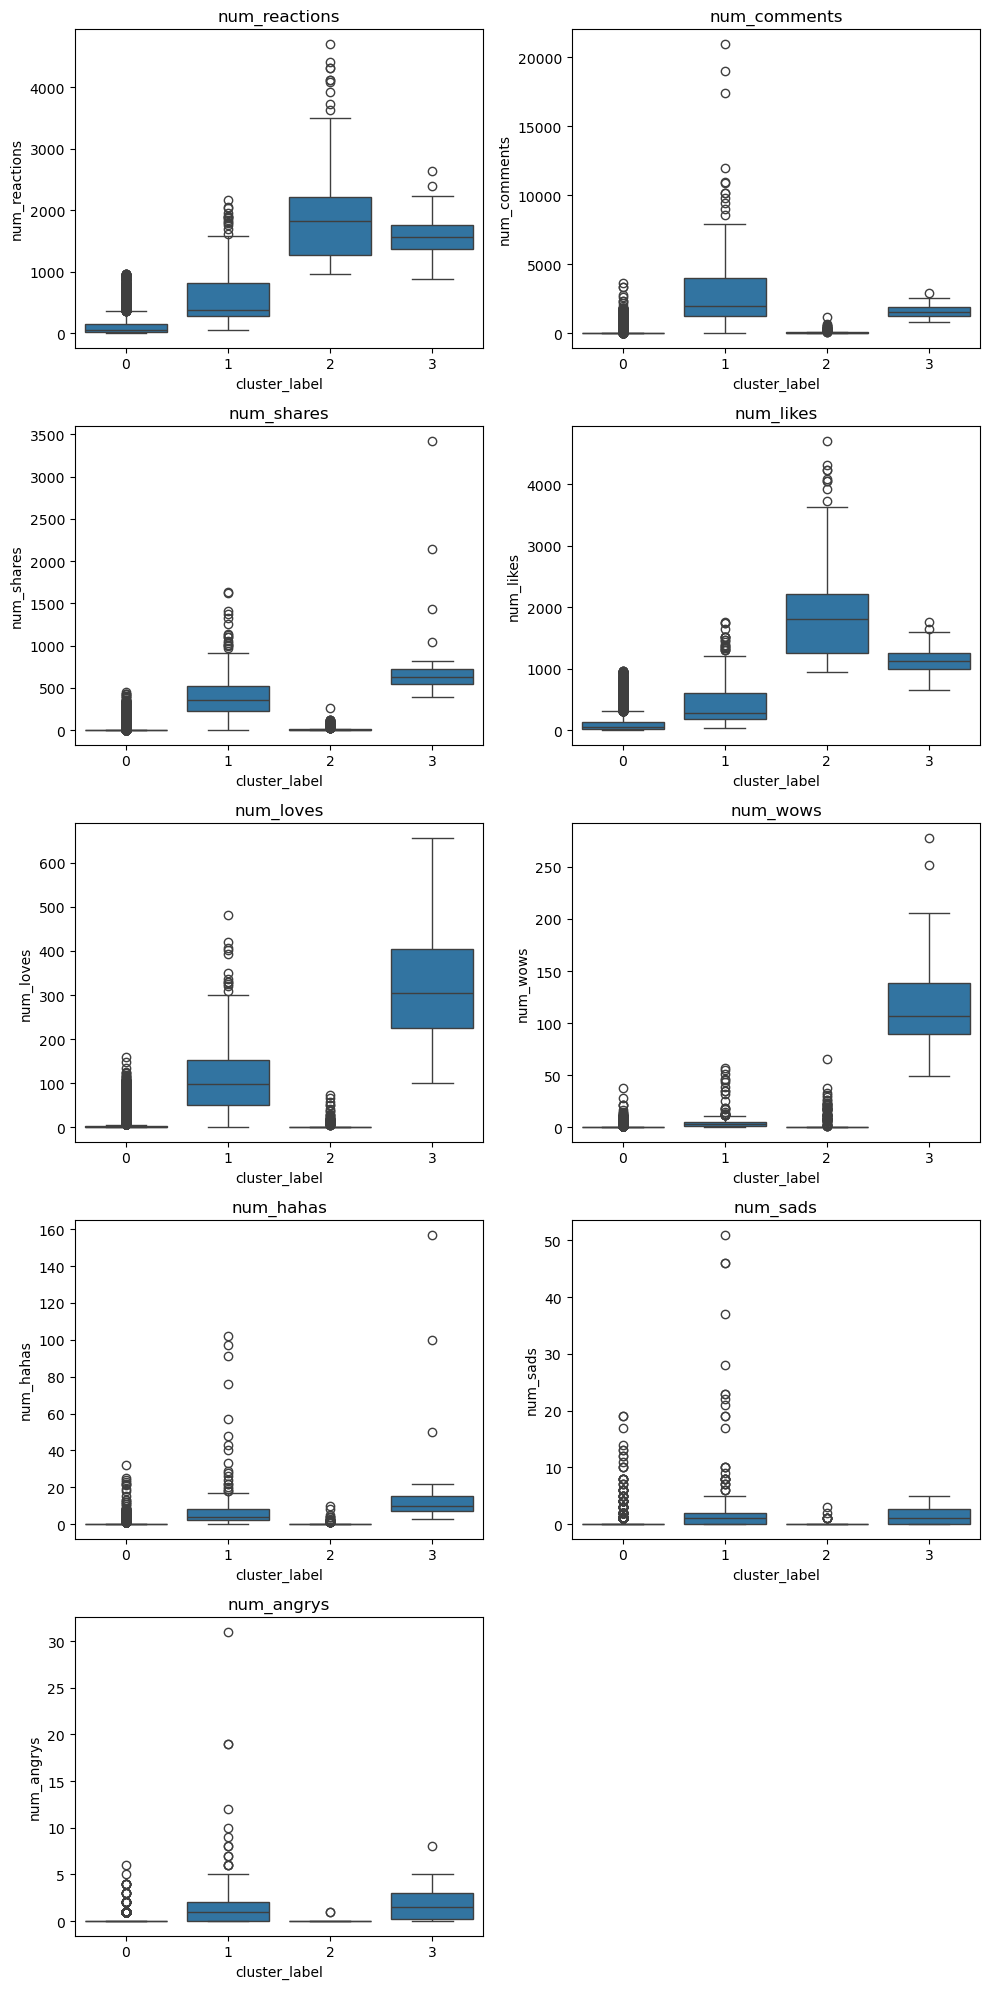

In [21]:
# Creer un Boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns) # -1 pour exclure la colonne status_type

# Nombre de lignes pour les ous-graphiques
num_rows = num_cols // 2
if num_cols % 2 :
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))

for i, column in enumerate(df_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster_label', y=column, data=df)
    plt.title(column)

plt.tight_layout()
plt.show()

### Interprétations de boxplots 
Pour chaque boxplot, il y a nos 4 clusters, et la barre la plus élévée signifie ce groupe domine dans cette varibles

Par exemple, le groupe 3 (ces publications sont caractérisées par de réactions), moins de commentaires, et de partages
A droite, dans le groupe 2, les publications sont beaucoup commentés

Le groupe 4, pourtout on a plus de commentaires, de likes, de réactions. bref ce groupe travail très bien, une prime dencouragement

Mais le premier groupe est resté partout dans le 1er Quartile et ailleurs dans le bas de la Limite de **Tukey**

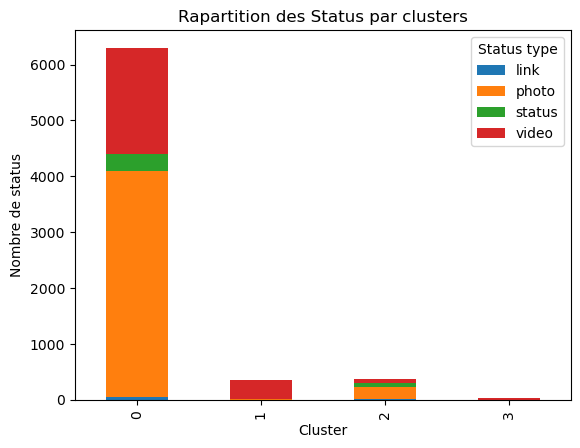

In [22]:
# Creer un table de contingence entre cluster_label et status_type
contingence_table = pd.crosstab(df['cluster_label'], df['status_type'])

# Tracer le barplot
contingence_table.plot(kind='bar', stacked=True)

# Ajouter des étiquettes et des titres
plt.xlabel("Cluster")
plt.ylabel("Nombre de status")
plt.title("Rapartition des Status par clusters")

# Afficher la légende
plt.legend(title='Status type')

# Afficher le graphique


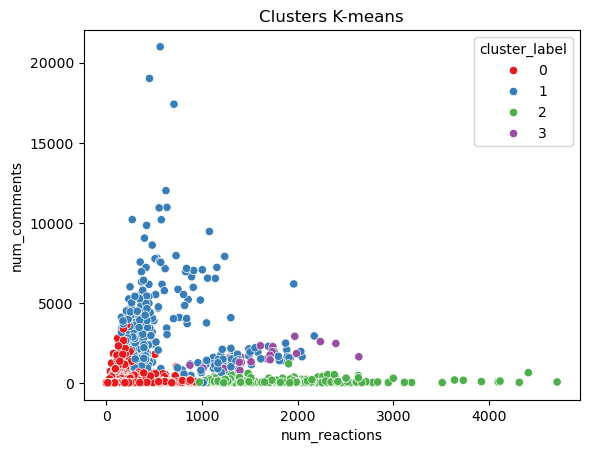

In [23]:
#Visualisation de Clusters
sns.scatterplot(data=df, x='num_reactions', y='num_comments', hue='cluster_label', palette='Set1')
plt.title('Clusters K-means')
plt.show()